In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
df = pd.read_csv('fake_reg.csv')

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
# sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1', 'feature2']].values

In [ ]:
y = df['price'].values

In [ ]:
# X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, random_state=42
)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_test.shape

(300, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# help(MinMaxScaler)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# X_train.min()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# model = Sequential([
#     Dense(
#         units=4, # 뉴런 수
#         activation='relu' # 활성화 함수
#     ),
#     Dense(4, activation='relu'),
#     Dense(1)
# ])

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(
    optimizer='rmsprop', # 경사하강법
    loss='mse' # 손실
)
# optimizer: rmsprop
# loss:
# 다중 클래스 분류일 경우: categorical_crossentropy
# 이진 분류 문제: binary_crossentropy
# Regression: mse

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=250, # 전체데이터셋을 한번 통과하는 수
    verbose=1 # 1:학습단계 출력, 값이 높을수록 출력 정보가 많음, 0: 끔
)

In [ ]:
# 차트로 시각화
loss_df = pd.DataFrame(model.history.history)

<Axes: >

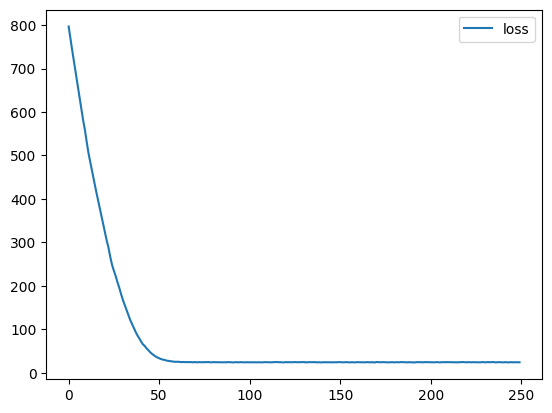

In [ ]:
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0) # Test set의 손실값 평가 MSE

27.211044311523438

In [ ]:
model.evaluate(X_train, y_train, verbose=0) # Test set의 손실값 평가 MSE

24.8319034576416

In [ ]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [ ]:
test_predictions

,0
0,406.371613
1,625.256958
2,593.757935
3,573.793335
4,367.584381
...,...
295,530.486511
296,516.731323
297,611.328674
298,418.071564


In [ ]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [ ]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [ ]:
pred_df

,Test True Y,0
0,402.296319,406.371613
1,624.156198,625.256958
2,582.455066,593.757935
3,578.588606,573.793335
4,371.224104,367.584381
...,...,...
295,525.704657,530.486511
296,502.909473,516.731323
297,612.727910,611.328674
298,417.569725,418.071564


In [ ]:
pred_df.columns = ['Test True Y', 'Model predictions']

In [ ]:
pred_df

,Test True Y,Model predictions
0,402.296319,406.371613
1,624.156198,625.256958
2,582.455066,593.757935
3,578.588606,573.793335
4,371.224104,367.584381
...,...,...
295,525.704657,530.486511
296,502.909473,516.731323
297,612.727910,611.328674
298,417.569725,418.071564


<Axes: xlabel='Test True Y', ylabel='Model predictions'>

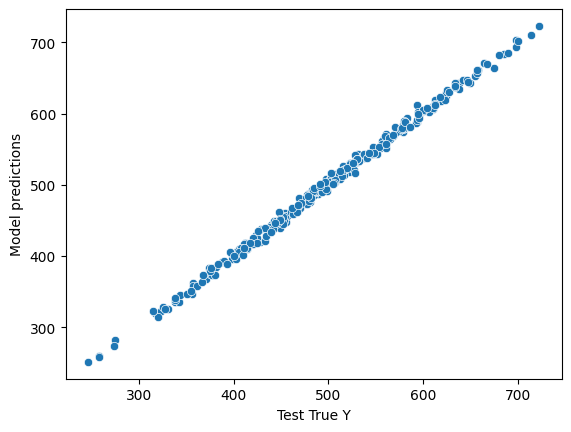

In [ ]:
sns.scatterplot(x='Test True Y', y='Model predictions', data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# 가격 예측값의 평균오차가 4정도 되는걸로 계산됨
mean_absolute_error(pred_df['Test True Y'], pred_df['Model predictions'])

4.231679354852761

In [ ]:
df.describe()

# mae는 평균값에서 얼마나 떨어져있는지의 오차 수치임
# mean이 498이면 현재 mae가 4정도 되니깐
# 오차의 크기는 평균가격의 1%가 안되므로 잘 학습됨

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [ ]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model predictions'])

# model.evaluate(X_test, y_test, verbose=0)와 같은 역할을함
# 결과값 27=MSE값임
# 모델 파라메터에 loss를 mse로 주고 학습을 시켰음. 마지막 학습 결과의 loss mse값인 27.얼마와 유사하게 나옴

27.211045222592546

In [ ]:
# RMSE
mean_squared_error(pred_df['Test True Y'], pred_df['Model predictions'])**0.5

5.216420729062462

In [ ]:
# 새로운 물건을 주웠음. 이 물건의 가격 예측해보자
new_gem = [[998, 1000]]

In [ ]:
# 스케일링된 데이터로 학습했기에 예측할 새로운 데이터도 스케일링해야함
new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem)
# 예측한 가격은 약 420원

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[420.80905]], dtype=float32)

In [ ]:
# 모델 저장하기
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_gem_model.keras') # 저장하기

In [ ]:
later_model = load_model('my_gem_model.keras') # 저장된 모델 불러오기

In [ ]:
later_model.predict(new_gem) # 불러온 모델로 예측해보기

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


array([[420.80905]], dtype=float32)